In [8]:
import numpy as np
import asdf
import matplotlib.pyplot as plt
from astropy.modeling.models import Linear1D, Gaussian1D, Voigt1D
from astropy.modeling.polynomial import Polynomial1D



In [2]:
with asdf.open("saved/m5_model.asdf") as ff:
    m5_model = ff['m5_model']

with asdf.open("saved/m1_model.asdf") as ff:
    m1_model = ff['m1_model']

m1_spec = np.load("saved/m1_spectra.npy")
m5_spec = np.load("saved/m5_spectra.npy")

badmom_m1 = np.load("saved/bad_m1.npy")
badmom_m5 = np.load("saved/bad_m5.npy")

xvals = np.load("saved/xvals.npy")

[Text(0.5, 1.0, 'Science Image (WL solution)'),
 Text(0.5, 1.0, 'Science Image (WL solution)')]

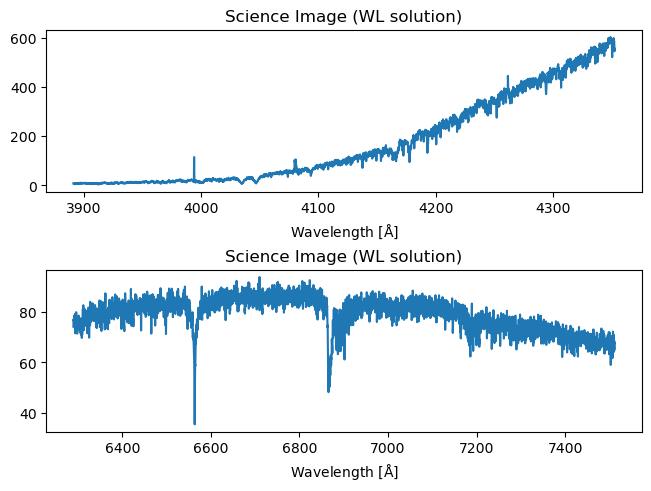

In [ ]:
fig, [ax1, ax2] = plt.subplots(2, 1, layout='constrained')
ax1.plot(m1_model(xvals[~badmom_m1]), m1_spec)
ax2.plot(m5_model(xvals[~badmom_m5]), m5_spec)

[ax.set_xlabel(r"Wavelength [$\rm{\AA}$]") for ax in [ax1, ax2]]
[ax.set_title("Science Image (WL solution)") for ax in [ax1, ax2]]

## Toss out M1 images

(6500.0, 6650.0)

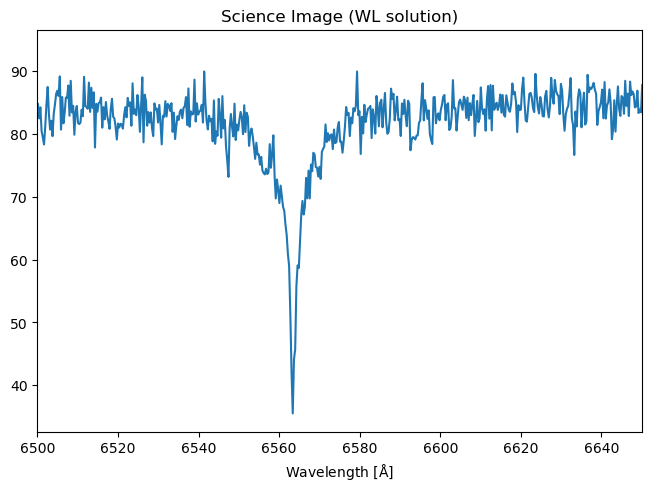

In [9]:
fig, ax = plt.subplots(1, 1, layout='constrained')
ax.plot(m5_model(xvals[~badmom_m5]), m5_spec)
ax.set_xlabel(r"Wavelength [$\rm{\AA}$]")
ax.set_title("Science Image (WL solution)")
ax.set_xlim(6500, 6650)

In [ ]:
absorption_model_guess = Linear1D(slope=0, intercept=80) + Voigt1D(6561, )

In [ ]:
absorption_model_guess = Linear1D(slope=0, intercept=175) + Gaussian1D(
    amplitude=-25, mean=486, stddev=3
)